In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# ------------------------------------------------------------------ #
#                               Imports                              #
# ------------------------------------------------------------------ #

import re
import nltk
import pandas as pd
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

In [3]:
# ------------------------------------------------------------------ #
#                        Joined Data cleaning                        #
# ------------------------------------------------------------------ #

df = pd.read_csv("../../dataset/data.csv")
df['combined_text'] = df['title'] + ' ' + df['text'] + ' ' + df['subject']
df.drop(['title', 'text', 'subject', 'date'], axis=1, inplace=True)

In [4]:
# ------------------------------------------------------------------ #
#                       Pre-processing pipeline                      #
# ------------------------------------------------------------------ #

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def pre_token_cleanup(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = text.encode('ascii', 'ignore').decode('utf-8')
    return text

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0]
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def preprocessing_pipeline(text):
    # Pre-token cleaning
    text = pre_token_cleanup(text)
    
    # Tokenization
    tokens = word_tokenize(text, language="english")
    
    # Cleaning steps
    tokens = [word.lower() for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens]
    
    return tokens

In [5]:
import numpy as np

def identity(x):
    return x

def get_weighted_embedding(tokens, model, idf_dict):
    vecs = []
    for word in tokens:
        if word in model.wv and word in idf_dict:
            vecs.append(model.wv[word] * idf_dict[word])
    if vecs:
        return np.mean(vecs, axis=0)
    else:
        return np.zeros(model.vector_size)


--- Fold 1/10 ---


/Users/joachimjasmin/.pyenv/versions/3.12.10/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:533: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


Accuracy fold 1 : 0.9479
              precision    recall  f1-score   support

   Fake News       0.95      0.94      0.95      1995
   Real News       0.94      0.95      0.95      2000

    accuracy                           0.95      3995
   macro avg       0.95      0.95      0.95      3995
weighted avg       0.95      0.95      0.95      3995



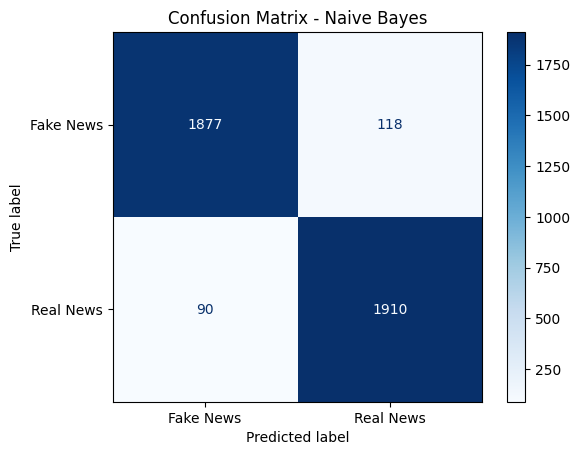

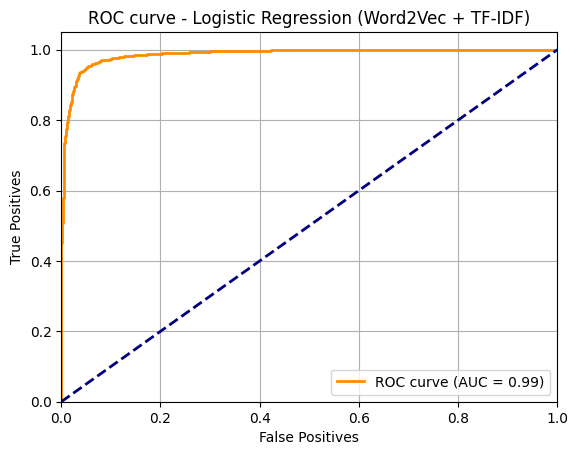


--- Fold 2/10 ---


/Users/joachimjasmin/.pyenv/versions/3.12.10/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:533: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


Accuracy fold 2 : 0.9502
              precision    recall  f1-score   support

   Fake News       0.95      0.95      0.95      1995
   Real News       0.95      0.95      0.95      2000

    accuracy                           0.95      3995
   macro avg       0.95      0.95      0.95      3995
weighted avg       0.95      0.95      0.95      3995



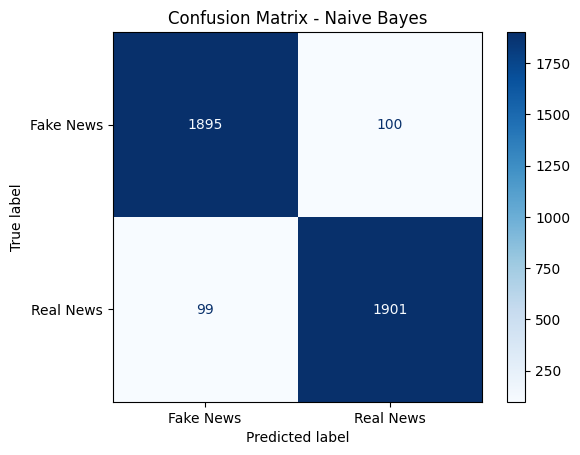

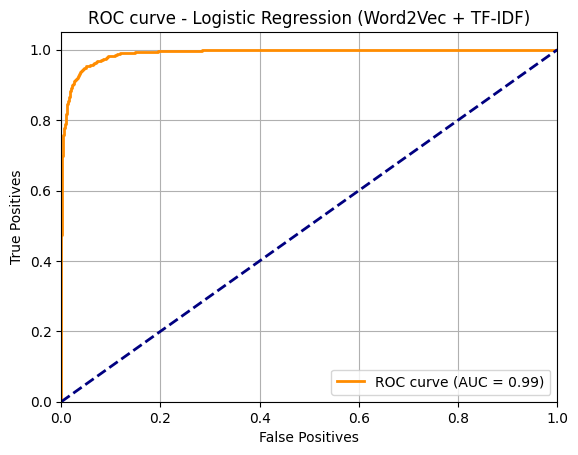


--- Fold 3/10 ---


/Users/joachimjasmin/.pyenv/versions/3.12.10/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:533: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


Accuracy fold 3 : 0.9509
              precision    recall  f1-score   support

   Fake News       0.95      0.95      0.95      1994
   Real News       0.95      0.95      0.95      2000

    accuracy                           0.95      3994
   macro avg       0.95      0.95      0.95      3994
weighted avg       0.95      0.95      0.95      3994



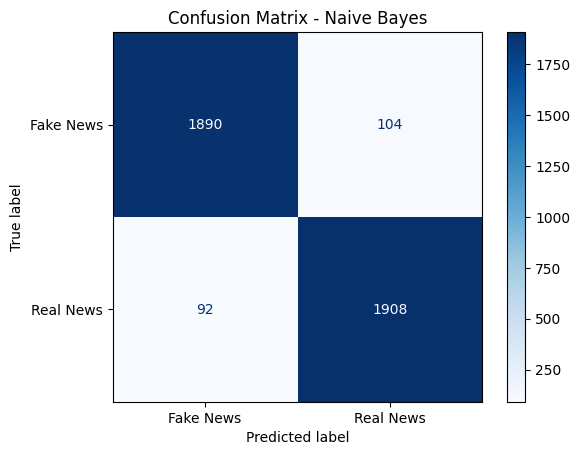

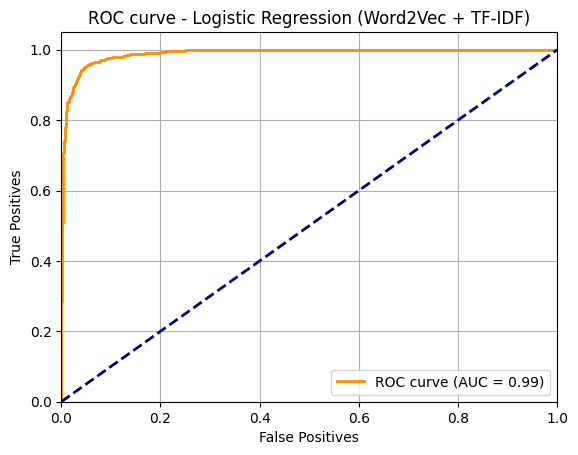


--- Fold 4/10 ---


/Users/joachimjasmin/.pyenv/versions/3.12.10/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:533: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


Accuracy fold 4 : 0.9464
              precision    recall  f1-score   support

   Fake News       0.95      0.94      0.95      1994
   Real News       0.94      0.95      0.95      2000

    accuracy                           0.95      3994
   macro avg       0.95      0.95      0.95      3994
weighted avg       0.95      0.95      0.95      3994



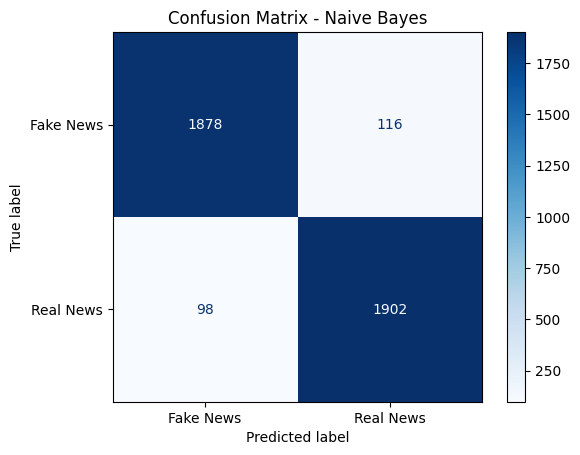

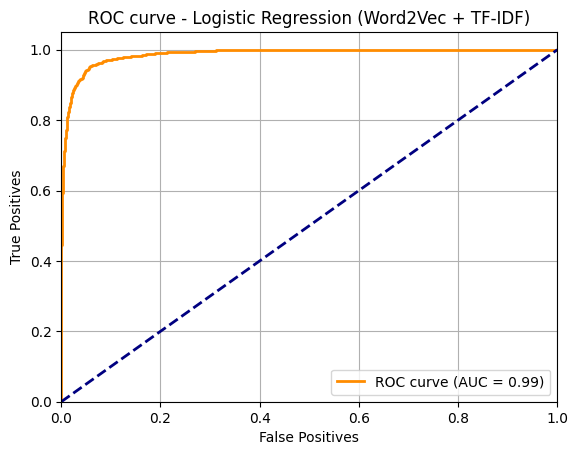


--- Fold 5/10 ---


/Users/joachimjasmin/.pyenv/versions/3.12.10/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:533: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


Accuracy fold 5 : 0.9474
              precision    recall  f1-score   support

   Fake News       0.95      0.95      0.95      1994
   Real News       0.95      0.95      0.95      2000

    accuracy                           0.95      3994
   macro avg       0.95      0.95      0.95      3994
weighted avg       0.95      0.95      0.95      3994



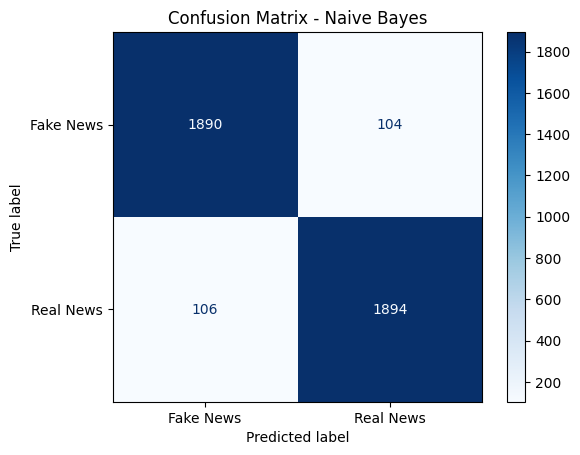

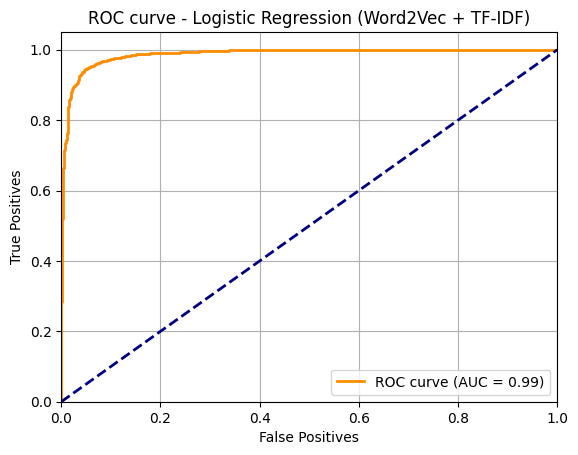


--- Fold 6/10 ---


/Users/joachimjasmin/.pyenv/versions/3.12.10/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:533: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


Accuracy fold 6 : 0.9432
              precision    recall  f1-score   support

   Fake News       0.95      0.94      0.94      1994
   Real News       0.94      0.95      0.94      2000

    accuracy                           0.94      3994
   macro avg       0.94      0.94      0.94      3994
weighted avg       0.94      0.94      0.94      3994



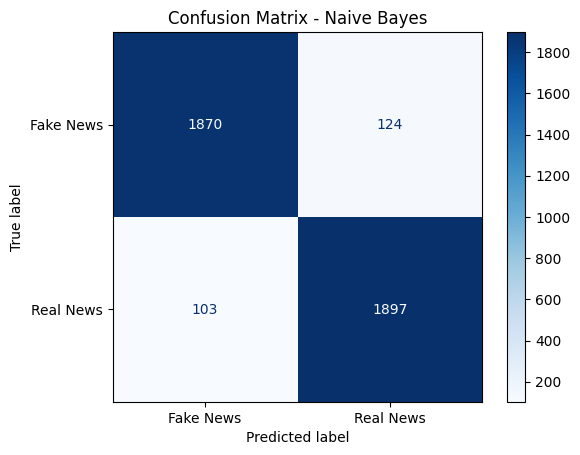

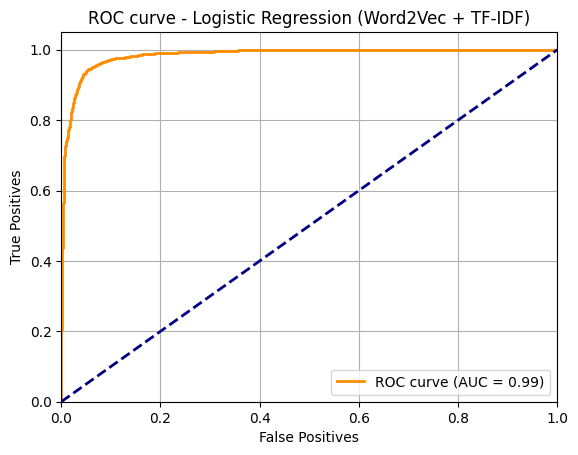


--- Fold 7/10 ---


/Users/joachimjasmin/.pyenv/versions/3.12.10/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:533: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


Accuracy fold 7 : 0.9399
              precision    recall  f1-score   support

   Fake News       0.94      0.94      0.94      1994
   Real News       0.94      0.94      0.94      2000

    accuracy                           0.94      3994
   macro avg       0.94      0.94      0.94      3994
weighted avg       0.94      0.94      0.94      3994



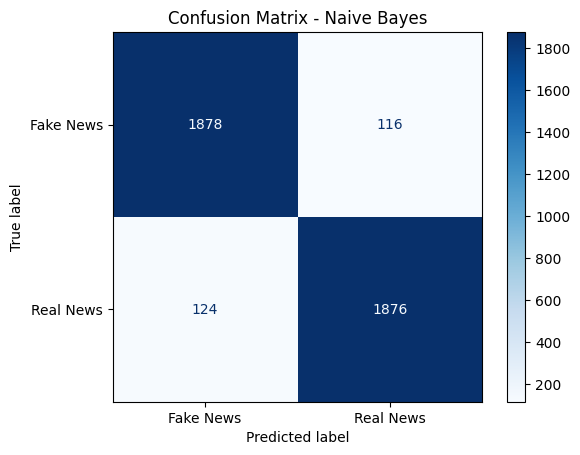

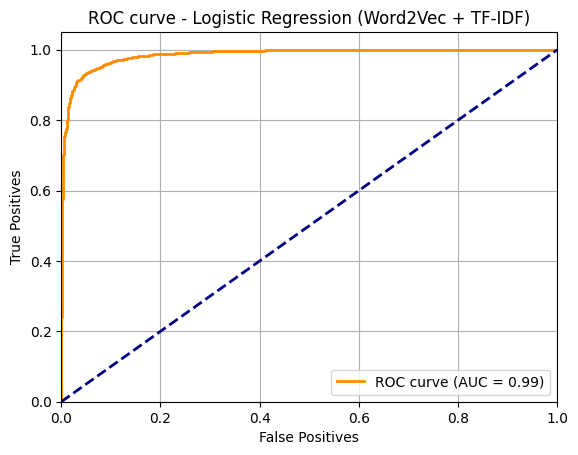


--- Fold 8/10 ---


/Users/joachimjasmin/.pyenv/versions/3.12.10/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:533: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


Accuracy fold 8 : 0.9404
              precision    recall  f1-score   support

   Fake News       0.94      0.94      0.94      1994
   Real News       0.94      0.95      0.94      2000

    accuracy                           0.94      3994
   macro avg       0.94      0.94      0.94      3994
weighted avg       0.94      0.94      0.94      3994



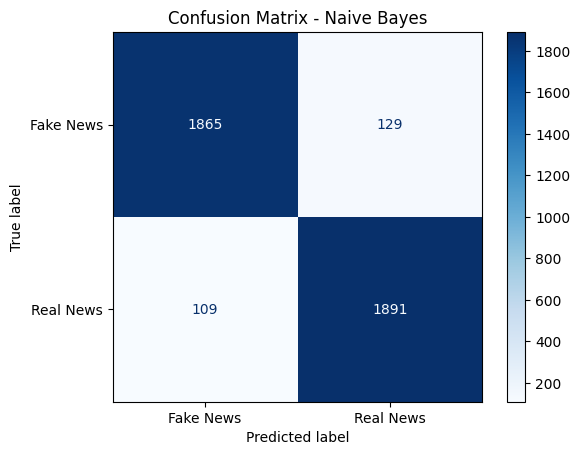

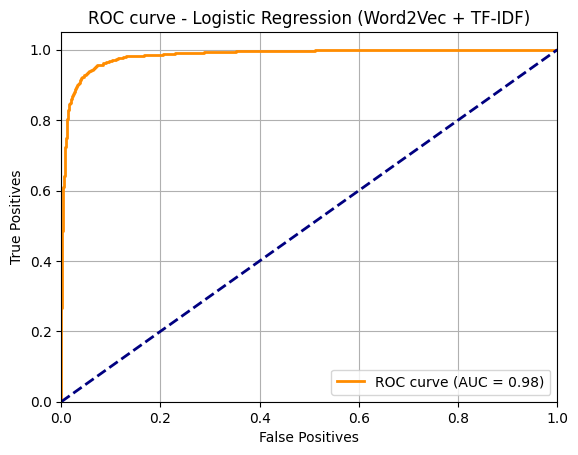


--- Fold 9/10 ---


/Users/joachimjasmin/.pyenv/versions/3.12.10/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:533: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


Accuracy fold 9 : 0.9379
              precision    recall  f1-score   support

   Fake News       0.94      0.93      0.94      1994
   Real News       0.93      0.94      0.94      2000

    accuracy                           0.94      3994
   macro avg       0.94      0.94      0.94      3994
weighted avg       0.94      0.94      0.94      3994



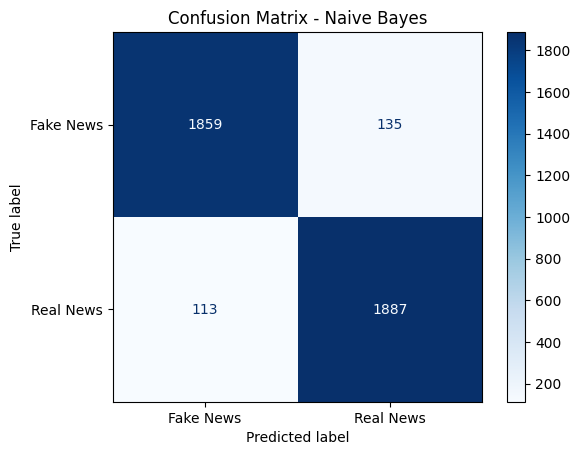

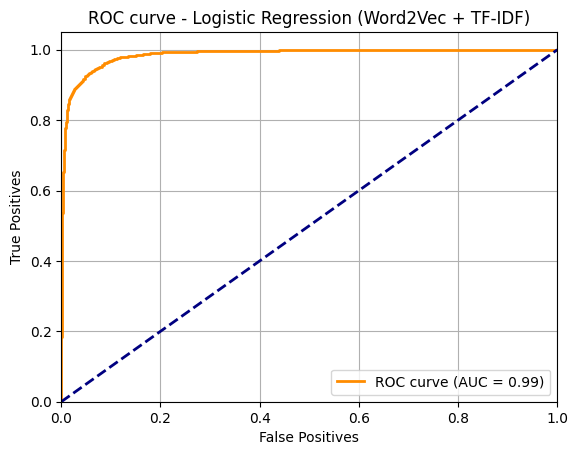


--- Fold 10/10 ---


/Users/joachimjasmin/.pyenv/versions/3.12.10/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:533: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


Accuracy fold 10 : 0.9429
              precision    recall  f1-score   support

   Fake News       0.95      0.93      0.94      1995
   Real News       0.93      0.95      0.94      1999

    accuracy                           0.94      3994
   macro avg       0.94      0.94      0.94      3994
weighted avg       0.94      0.94      0.94      3994



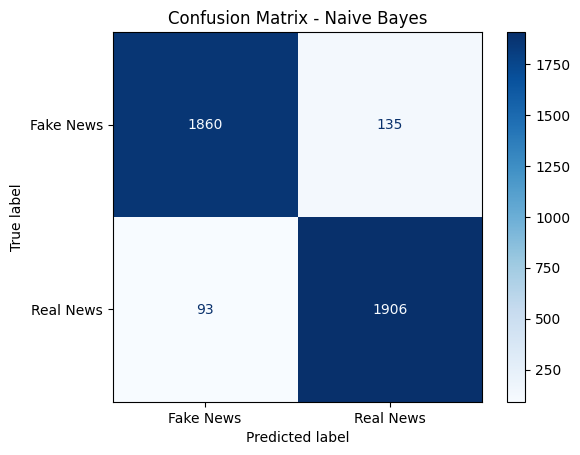

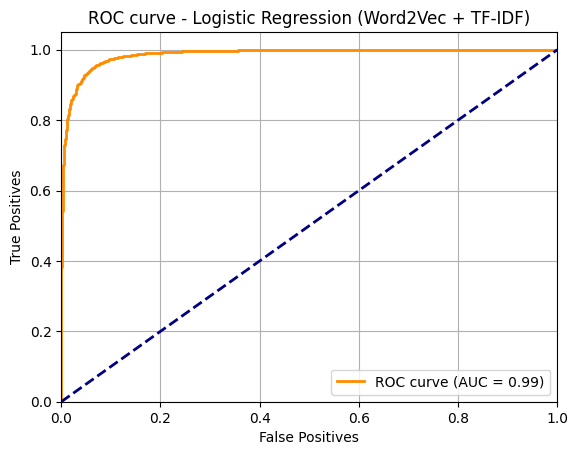


--- Final Metrics ---
Cross-validation mean accuracy: 0.9447 ± 0.0043
Accuracies by fold: [0.9479 0.9502 0.9509 0.9464 0.9474 0.9432 0.9399 0.9404 0.9379 0.9429]


In [7]:
# ------------------------------------------------------------------ #
#                    Sratified K-Fold cross valid                    #
# ------------------------------------------------------------------ #

import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

X_full = df['combined_text']
y_full = df['label']

accuracies = []
reports = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X_full, y_full)):
  print(f"\n--- Fold {fold+1}/{n_splits} ---")

  # Train/test split for k-fold
  X_train, X_test = X_full.iloc[train_idx], X_full.iloc[test_idx]
  y_train, y_test = y_full.iloc[train_idx], y_full.iloc[test_idx]

  # Preprocess the data
  X_train = X_train.apply(preprocessing_pipeline)
  X_test = X_test.apply(preprocessing_pipeline)

  # w2Vec sur TRAIN
  w2v_model = Word2Vec(sentences=X_train, vector_size=100, window=5, min_count=1, workers=4)

  # TF-IDF sur TRAIN
  tfidf_vectorizer = TfidfVectorizer(
    analyzer=identity,
    min_df=0.01,
    max_df=0.9,
    ngram_range=(1, 3)
  )

  tfidf_vectorizer.fit(X_train)
  idf_weights = dict(zip(tfidf_vectorizer.get_feature_names_out(), tfidf_vectorizer.idf_))

  # Weighthed embedding gen
  doc_embeddings_train = np.array([
    get_weighted_embedding(doc, w2v_model, idf_weights)
    for doc in X_train
  ])

  doc_embeddings_test = np.array([
      get_weighted_embedding(doc, w2v_model, idf_weights)
      for doc in X_test
  ])

  # Modelisation
  model = LogisticRegression(max_iter=1000, random_state=42)
  model.fit(doc_embeddings_train, y_train)
  y_pred = model.predict(doc_embeddings_test)

  # Evaluation
  acc = accuracy_score(y_test, y_pred)
  accuracies.append(acc)
  print(f"Accuracy fold {fold + 1} : {acc:.4f}")
  
  report = classification_report(y_test, y_pred, target_names=["Fake News", "Real News"])
  reports.append(report)
  print(report)

  cm = confusion_matrix(y_test, y_pred) # Labels (1 = Real News, 0 = fake News)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fake News", "Real News"])
  disp.plot(cmap="Blues")
  plt.title("Confusion Matrix - Naive Bayes")
  plt.show()

  y_proba = model.predict_proba(doc_embeddings_test)[:, 1]
  fpr, tpr, thresholds = roc_curve(y_test, y_proba)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positives")
  plt.ylabel("True Positives")
  plt.title("ROC curve - Logistic Regression (Word2Vec + TF-IDF)")
  plt.legend(loc="lower right")
  plt.grid()
  plt.show()

# FINAL METRICS
print("\n--- Final Metrics ---")
print("="*40)
print(f"Cross-validation mean accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print("Accuracies by fold:", np.round(accuracies, 4))